## Lab5 - ML

In [128]:
#importing necessary modules and frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing modules for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#importing the models
from sklearn.linear_model import LinearRegression

In [129]:
df = pd.read_csv("Android_Malware.csv")  #reading the dataset
df.dropna(inplace=True)  #dropping the empty rows
df.drop(' Timestamp', axis=1, inplace=True)  #dropping the timestamp column
df.head()

<ipython-input-129-2975439cced4>:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Android_Malware.csv")  #reading the dataset


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


# Question A1

In [130]:
#function to encode the non-numerical columns to numerics using LabelEncoder
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N') #filling empty cells in dataframe
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)  #encoding
    return df

In [131]:
from math import ceil

#balancing the unbalanced data so that they have equal amount of each label type
def balance_data(data, random_state=0):
    X = data.drop("Label", axis=1)
    y = data["Label"]
    class_counts = y.value_counts()  #counting the number of classes in labels of dataset
    minority_class_count = ceil(class_counts.min() / 5) #setting so that the row size is reduced  to 1/5th of the original minimum
    balanced_data = pd.DataFrame(columns=data.columns)  #making an empty dataframe

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)   #resampling dataset to make so that it has only min_count rows of each type
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

In [132]:
# splitting the dataset into train and test data
def splitData(df):
  X = np.array(df['Total Length of Fwd Packets']).reshape(-1,1)  #chosing only one column of dataset as x
  y = np.array(df['Label']).reshape(-1,1)  #choosing the label target as y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

# Question A2

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# a function to return errors
def find_error(y_test, y_pred):
  mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
  #squared True returns MSE value, False returns RMSE value.
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
  rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

  #printing errors
  print("MAE:",mae)
  print("MSE:",mse)
  print("RMSE:",rmse)

In [134]:
def linearRegression(df):
  df = labelencoder(df)  #encoding the dataqframe
  df = balance_data(df)  #balancing dataset to have equal classes

  X_train, X_test, y_train, y_test = splitData(df)  #splitting dataset into train and test data

  regressor = LinearRegression()  #creating a linear regression object

  regressor.fit(X_train, y_train)  #training the model

  y_pred = regressor.predict(X_train)  #predicting the values

  #plotting the graph
  plt.scatter(X_train, y_train, color ='b')
  plt.plot(X_train, y_pred, color ='k')

  plt.show()

  print("regressor_score: ", regressor.score(X_train, y_train))  #printing the score

  find_error(y_train, y_pred)  #printing the errors

<ipython-input-131-50b583461c86>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


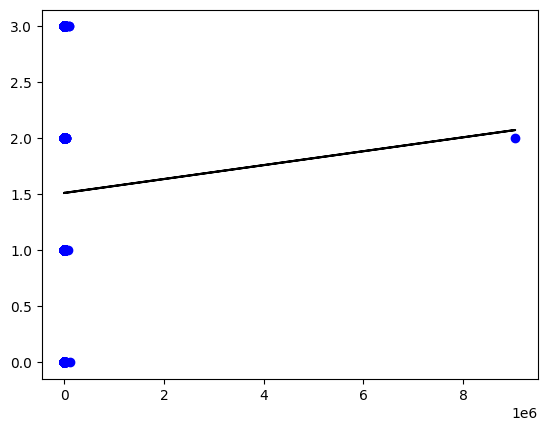

regressor_score:  1.9139412529733946e-05
MAE: 0.9961198377651084
MSE: 1.242368069999985
RMSE: 1.1146156602165542


In [135]:
linearRegression(df) #calling the linear regression function on dataframe

# Question A2

In [136]:
def linearRegression_a2(df):
  df = labelencoder(df)  #encoding the dataframe
  df = balance_data(df)  #balancing the dataframe

  X_train, X_test, y_train, y_test = splitData(df)  #splitting the dataframe into train and test data

  regressor = LinearRegression()  #creating a linear regression object

  regressor.fit(X_train, y_train)  #training the model

  y_pred = regressor.predict(X_test) #predicting the result

  #plotting the graph
  plt.scatter(X_test, y_test, color ='b')
  plt.plot(X_test, y_pred, color ='k')

  plt.show()

  print("regressor_score: ", regressor.score(X_test, y_test))  #printing the score

  find_error(y_test, y_pred)  #printing the errors

<ipython-input-131-50b583461c86>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


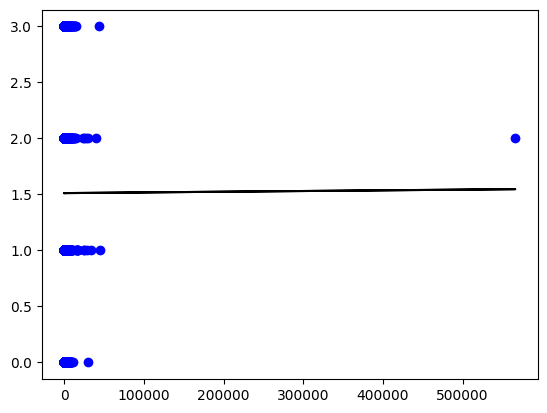

regressor_score:  -0.0013187950857467268
MAE: 1.0089689843658285
MSE: 1.2682408468302513
RMSE: 1.1261619984843438


In [137]:
linearRegression_a2(df) #calling the linear regression function on dataframe

# Question A3

In [138]:
#function to split dataframe into train and test data
def splitData_a3(df):
  X = df[['Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Total Fwd Packets', ' Total Backward Packets', ' Fwd Header Length', ' Bwd Header Length']]
  y = df['Label']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

In [139]:
def linearRegression_a3(df):
  df = labelencoder(df)  #encoding the dataframe
  df = balance_data(df)  #balancing the dataframe

  X_train, X_test, y_train, y_test = splitData_a3(df)  #splitting the dataframe into train and test data

  regressor = LinearRegression()  #creating a linear regression object

  regressor.fit(X_train, y_train)  #training the model

  y_pred = regressor.predict(X_test)  #predicting the result

  print("regressor_score: ", regressor.score(X_test, y_test))  #printing the score

  find_error(y_test, y_pred)  #printing the errors

In [140]:
linearRegression_a3(df) #calling the linear regression function on dataframe

<ipython-input-131-50b583461c86>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


regressor_score:  -0.0026769846879011183
MAE: 1.0089456740667948
MSE: 1.269961089713583
RMSE: 1.1269255031782637


# Question A4

In [141]:
from sklearn.cluster import KMeans

#a function to perform kMeans clustering on the dataset into given number of clusters
def K_means_cluster(df, no_of_clusters):
  kmeans = KMeans(n_clusters=no_of_clusters, random_state=0, n_init="auto").fit(df)  #creating a kmeans object and fitting the data
  return kmeans

In [142]:
# a function to print the cluster labels and centers of a given kmeans cluster
def print_kmeans(kmeans):
  print(kmeans.labels_)
  print(kmeans.cluster_centers_)

In [143]:
df_balanced = balance_data(df)  #balancing the dataset
X_train, X_test, y_train, y_test = splitData(df_balanced)  #splitting the dataset into train and test data

kmeans = K_means_cluster(X_train, 2)  #calling the kmeans function on train data
print_kmeans(kmeans)  #printing the cluster labels and centers

[0 0 0 ... 0 0 0]
[[5.92158331e+02]
 [9.04378100e+06]]


<ipython-input-131-50b583461c86>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


#Question A5

In [144]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# a function to calculate silhouette_score, calinski_harabasz_score, davies_bouldin_score and printing them
def cluster_metrics(df, no_of_clusters):
  kmeans = K_means_cluster(df, no_of_clusters)  #calling the kmeans function on train data

  #calculating the metrics
  sil_score = silhouette_score(df, kmeans.labels_)
  calinski_score = calinski_harabasz_score(df, kmeans.labels_)
  davies_score = davies_bouldin_score(df, kmeans.labels_)

  #printing the scores
  print("silhouette_score: ", sil_score)
  print("calinski_harabasz_score: ", calinski_score)
  print("davies_bouldin_score: ", davies_score)

  return sil_score, calinski_score, davies_score

In [145]:
cluster_metrics(X_train, 2)  #calling the cluster_metrics function on train data

silhouette_score:  0.9998126162695493
calinski_harabasz_score:  13324723.709913103
davies_bouldin_score:  9.16346310158469e-05


(0.9998126162695493, 13324723.709913103, 9.16346310158469e-05)

#Question A6

k:  2
silhouette_score:  0.9998126162695493
calinski_harabasz_score:  13324723.709913103
davies_bouldin_score:  9.16346310158469e-05

k:  3
silhouette_score:  0.9734667147920263
calinski_harabasz_score:  13513273.470673533
davies_bouldin_score:  0.31357424420227725

k:  4
silhouette_score:  0.9113197939659092
calinski_harabasz_score:  15644139.232593853
davies_bouldin_score:  0.39181928406619626

k:  5
silhouette_score:  0.8723237478308773
calinski_harabasz_score:  25642218.123402018
davies_bouldin_score:  0.33514608282135144

k:  6
silhouette_score:  0.8249488461353415
calinski_harabasz_score:  32071865.672742113
davies_bouldin_score:  0.3809070414089752

k:  7
silhouette_score:  0.8275848830606795
calinski_harabasz_score:  38123006.70336359
davies_bouldin_score:  0.37822145529116735

k:  8
silhouette_score:  0.8035379702287133
calinski_harabasz_score:  39759772.45720903
davies_bouldin_score:  0.34010500863148563

k:  9
silhouette_score:  0.8033211475884791
calinski_harabasz_score:  4

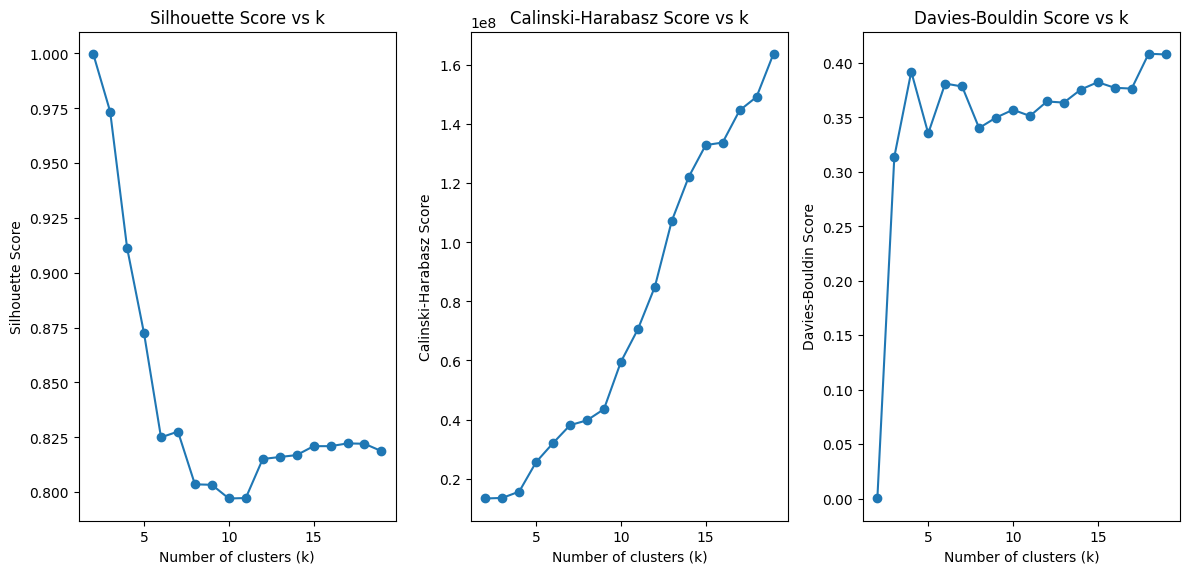

In [149]:

#making list of different scores for different numbers of clusters
sil_scores = []
calinski_scores = []
davies_scores = []

# Loop through different k values and calculate the metrics
for i in range(2, 20):
  print("k: ", i)
  sil_score, calinski_score, davies_score = cluster_metrics(X_train, i)  #calling the cluster_metrics function on train data
  sil_scores.append(sil_score)
  calinski_scores.append(calinski_score)
  davies_scores.append(davies_score)
  print()

plt.figure(figsize=(12, 6))
k_values = range(2, 20)

# Silhouette Score plot
plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Score plot
plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

# Davies-Bouldin Score plot
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_scores, marker='o')
plt.title('Davies-Bouldin Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

#Question A7

[81467953253.19775, 47076576052.96237, 23444903555.468864, 10640312344.651276, 6807848758.350525, 4593033294.136848, 4314276315.30893, 3285486921.4015517, 2040910206.56581, 1549132418.709384, 1194251526.4484713, 860582637.3506685, 669276225.1312559, 563672697.8049289, 542517219.8535705, 520612587.361139, 428592509.87211037, 352909495.7146203]


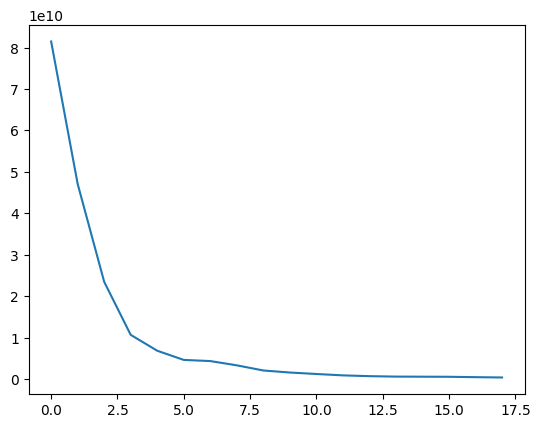

In [147]:
#making an empty list to store the inertia of the clusters
distorsions = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_train)  #calling the kmeans clustering for different number of clusters
  distorsions.append(kmeans.inertia_)
print(distorsions)
plt.plot(distorsions) #plotting the elbow curve